In [ ]:
#Air Quality Prediction

In [2]:
import pandas as pd
import numpy as np

In [4]:
aqd=pd.read_csv('C:/Users/SUSHMITHA/Desktop/AirQualityUCI.csv')

In [6]:
aqd.head()

Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;
10/03/2004;18.00.00;2            6;1360;150;11                 9;1046;166;1056;113;1692;1268;13 6;48 9;0                                                7578;;                                                                          
10/03/2004;19.00.00;2;1292;112;9 4;955;103;1174;92;1559;972;13 3;47                             7;0  7255;;                                                NaN                                                                          
10/03/2004;20.00.00;2            2;1402;88;9                   0;939;131;1140;114;1555;1074;11  9;54 0;0                                                7502;;                                                                          
10/03/2004;21.00.00;2            2;1376;80;9                   2;948;172;1092;122;1584;1203;11  0;60 0;0                                                7867;;                                                                          
10/03/2004;22.00.00;1            6;1272;51;6                   5;836;131;1205;116;1490;1110;11  2;59 6;0                                                7888;;

In [8]:
aqd=pd.read_csv('C:/Users/SUSHMITHA/Desktop/AirQualityUCI.csv', sep=';', decimal=',')

In [10]:
aqd.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  Unnamed: 15  Unnamed: 16  
0  13.6  48.9  0.7578          NaN          NaN  
1  13.3  47.7  0.7255          NaN          NaN  
2  11.9  54.0  0.7502          NaN          NaN  
3  11.0  60.0  0.7867          NaN          NaN  
4  11.2  59.6  0.7888          NaN          NaN

In [11]:
aqd=aqd.iloc[:,:-2]
aqd.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  
0  13.6  48.9  0.7578  
1  13.3  47.7  0.7255  
2  11.9  54.0  0.7502  
3  11.0  60.0  0.7867  
4  11.2  59.6  0.7888

In [13]:
aqd.shape

(9471, 15)

In [17]:
aqd.loc[[9357]]

Date Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
9357  NaN  NaN     NaN          NaN       NaN       NaN            NaN   

      NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)   T  RH  AH  
9357      NaN           NaN      NaN           NaN          NaN NaN NaN NaN

In [19]:
aqd=aqd.head(9357)
aqd.tail()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
9352  04/04/2005  10.00.00     3.1       1314.0    -200.0      13.5   
9353  04/04/2005  11.00.00     2.4       1163.0    -200.0      11.4   
9354  04/04/2005  12.00.00     2.4       1142.0    -200.0      12.4   
9355  04/04/2005  13.00.00     2.1       1003.0    -200.0       9.5   
9356  04/04/2005  14.00.00     2.2       1071.0    -200.0      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
9352         1101.0    472.0         539.0    190.0        1374.0   
9353         1027.0    353.0         604.0    179.0        1264.0   
9354         1063.0    293.0         603.0    175.0        1241.0   
9355          961.0    235.0         702.0    156.0        1041.0   
9356         1047.0    265.0         654.0    168.0        1129.0   

      PT08.S5(O3)     T    RH      AH  
9352       1729.0  21.9  29.3  0.7568  
9353       1269.0  24.3  23.7  0.7119  
9354       1092.0  26.9  18.3  0.6406  
9355        770.0  28.3  13.5  0.5139  
9356        816.0  28.5  13.1  0.5028

In [21]:
aqd.shape

(9357, 15)

In [23]:
aqd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [25]:
aqd.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [27]:
aqd.isin([-200]).sum(axis=0)

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [29]:
aqd=aqd.replace(to_replace=-200, value=np.NaN)
aqd.isnull().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [33]:
aqd.tail()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
9352  04/04/2005  10.00.00     3.1       1314.0       NaN      13.5   
9353  04/04/2005  11.00.00     2.4       1163.0       NaN      11.4   
9354  04/04/2005  12.00.00     2.4       1142.0       NaN      12.4   
9355  04/04/2005  13.00.00     2.1       1003.0       NaN       9.5   
9356  04/04/2005  14.00.00     2.2       1071.0       NaN      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
9352         1101.0    472.0         539.0    190.0        1374.0   
9353         1027.0    353.0         604.0    179.0        1264.0   
9354         1063.0    293.0         603.0    175.0        1241.0   
9355          961.0    235.0         702.0    156.0        1041.0   
9356         1047.0    265.0         654.0    168.0        1129.0   

      PT08.S5(O3)     T    RH      AH  
9352       1729.0  21.9  29.3  0.7568  
9353       1269.0  24.3  23.7  0.7119  
9354       1092.0  26.9  18.3  0.6406  
9355        770.0  28.3  13.5  0.5139  
9356        816.0  28.5  13.1  0.5028

In [36]:
aqd.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  
0  13.6  48.9  0.7578  
1  13.3  47.7  0.7255  
2  11.9  54.0  0.7502  
3  11.0  60.0  0.7867  
4  11.2  59.6  0.7888

In [54]:
aqd.mean()

2.1527495439145166

In [57]:
aqd.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [61]:
n=aqd.select_dtypes(include=['float64']).columns
m=aqd[n].mean()
m

CO(GT)              2.152750
PT08.S1(CO)      1099.833166
NMHC(GT)          218.811816
C6H6(GT)           10.083105
PT08.S2(NMHC)     939.153376
NOx(GT)           246.896735
PT08.S3(NOx)      835.493605
NO2(GT)           113.091251
PT08.S4(NO2)     1456.264598
PT08.S5(O3)      1022.906128
T                  18.317829
RH                 49.234201
AH                  1.025530
dtype: float64

In [64]:
aqd=aqd.fillna(m)
aqd.tail()

Date      Time  CO(GT)  PT08.S1(CO)    NMHC(GT)  C6H6(GT)  \
9352  04/04/2005  10.00.00     3.1       1314.0  218.811816      13.5   
9353  04/04/2005  11.00.00     2.4       1163.0  218.811816      11.4   
9354  04/04/2005  12.00.00     2.4       1142.0  218.811816      12.4   
9355  04/04/2005  13.00.00     2.1       1003.0  218.811816       9.5   
9356  04/04/2005  14.00.00     2.2       1071.0  218.811816      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
9352         1101.0    472.0         539.0    190.0        1374.0   
9353         1027.0    353.0         604.0    179.0        1264.0   
9354         1063.0    293.0         603.0    175.0        1241.0   
9355          961.0    235.0         702.0    156.0        1041.0   
9356         1047.0    265.0         654.0    168.0        1129.0   

      PT08.S5(O3)     T    RH      AH  
9352       1729.0  21.9  29.3  0.7568  
9353       1269.0  24.3  23.7  0.7119  
9354       1092.0  26.9  18.3  0.6406  
9355        770.0  28.3  13.5  0.5139  
9356        816.0  28.5  13.1  0.5028

In [66]:
aqd.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [72]:
pip install scikit-learn


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [81]:
!pip install pandas-visual-analysis

   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.2/15.6 MB 5.8 MB/s eta 0:00:03
   - -------------------------------------- 0.5/15.6 MB 6.2 MB/s eta 0:00:03
   - -------------------------------------- 0.6/15.6 MB 5.7 MB/s eta 0:00:03
   -- ------------------------------------- 0.9/15.6 MB 5.8 MB/s eta 0:00:03
   --- ------------------------------------ 1.2/15.6 MB 5.8 MB/s eta 0:00:03
   --- ------------------------------------ 1.3/15.6 MB 5.4 MB/s eta 0:00:03
   --- ------------------------------------ 1.5/15.6 MB 5.5 MB/s eta 0:00:03
   ---- ----------------------------------- 1.8/15.6 MB 5.6 MB/s eta 0:00:03
   ----- ---------------------------------- 2.0/15.6 MB 5.3 MB/s eta 0:00:03
   ----- ---------------------------------- 2.3/15.6 MB 5.4 MB/s eta 0:00:03
   ------ --------------------------------- 2.7/15.6 MB 5.6 MB/s eta 0:00:03
   ------- -------------------------------- 3.0/15.6 MB 5.5 MB/s eta 0:00:03
   ---


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings("ignore")
from pandas_visual_analysis import VisualAnalysis

In [121]:
VisualAnalysis(aqd)

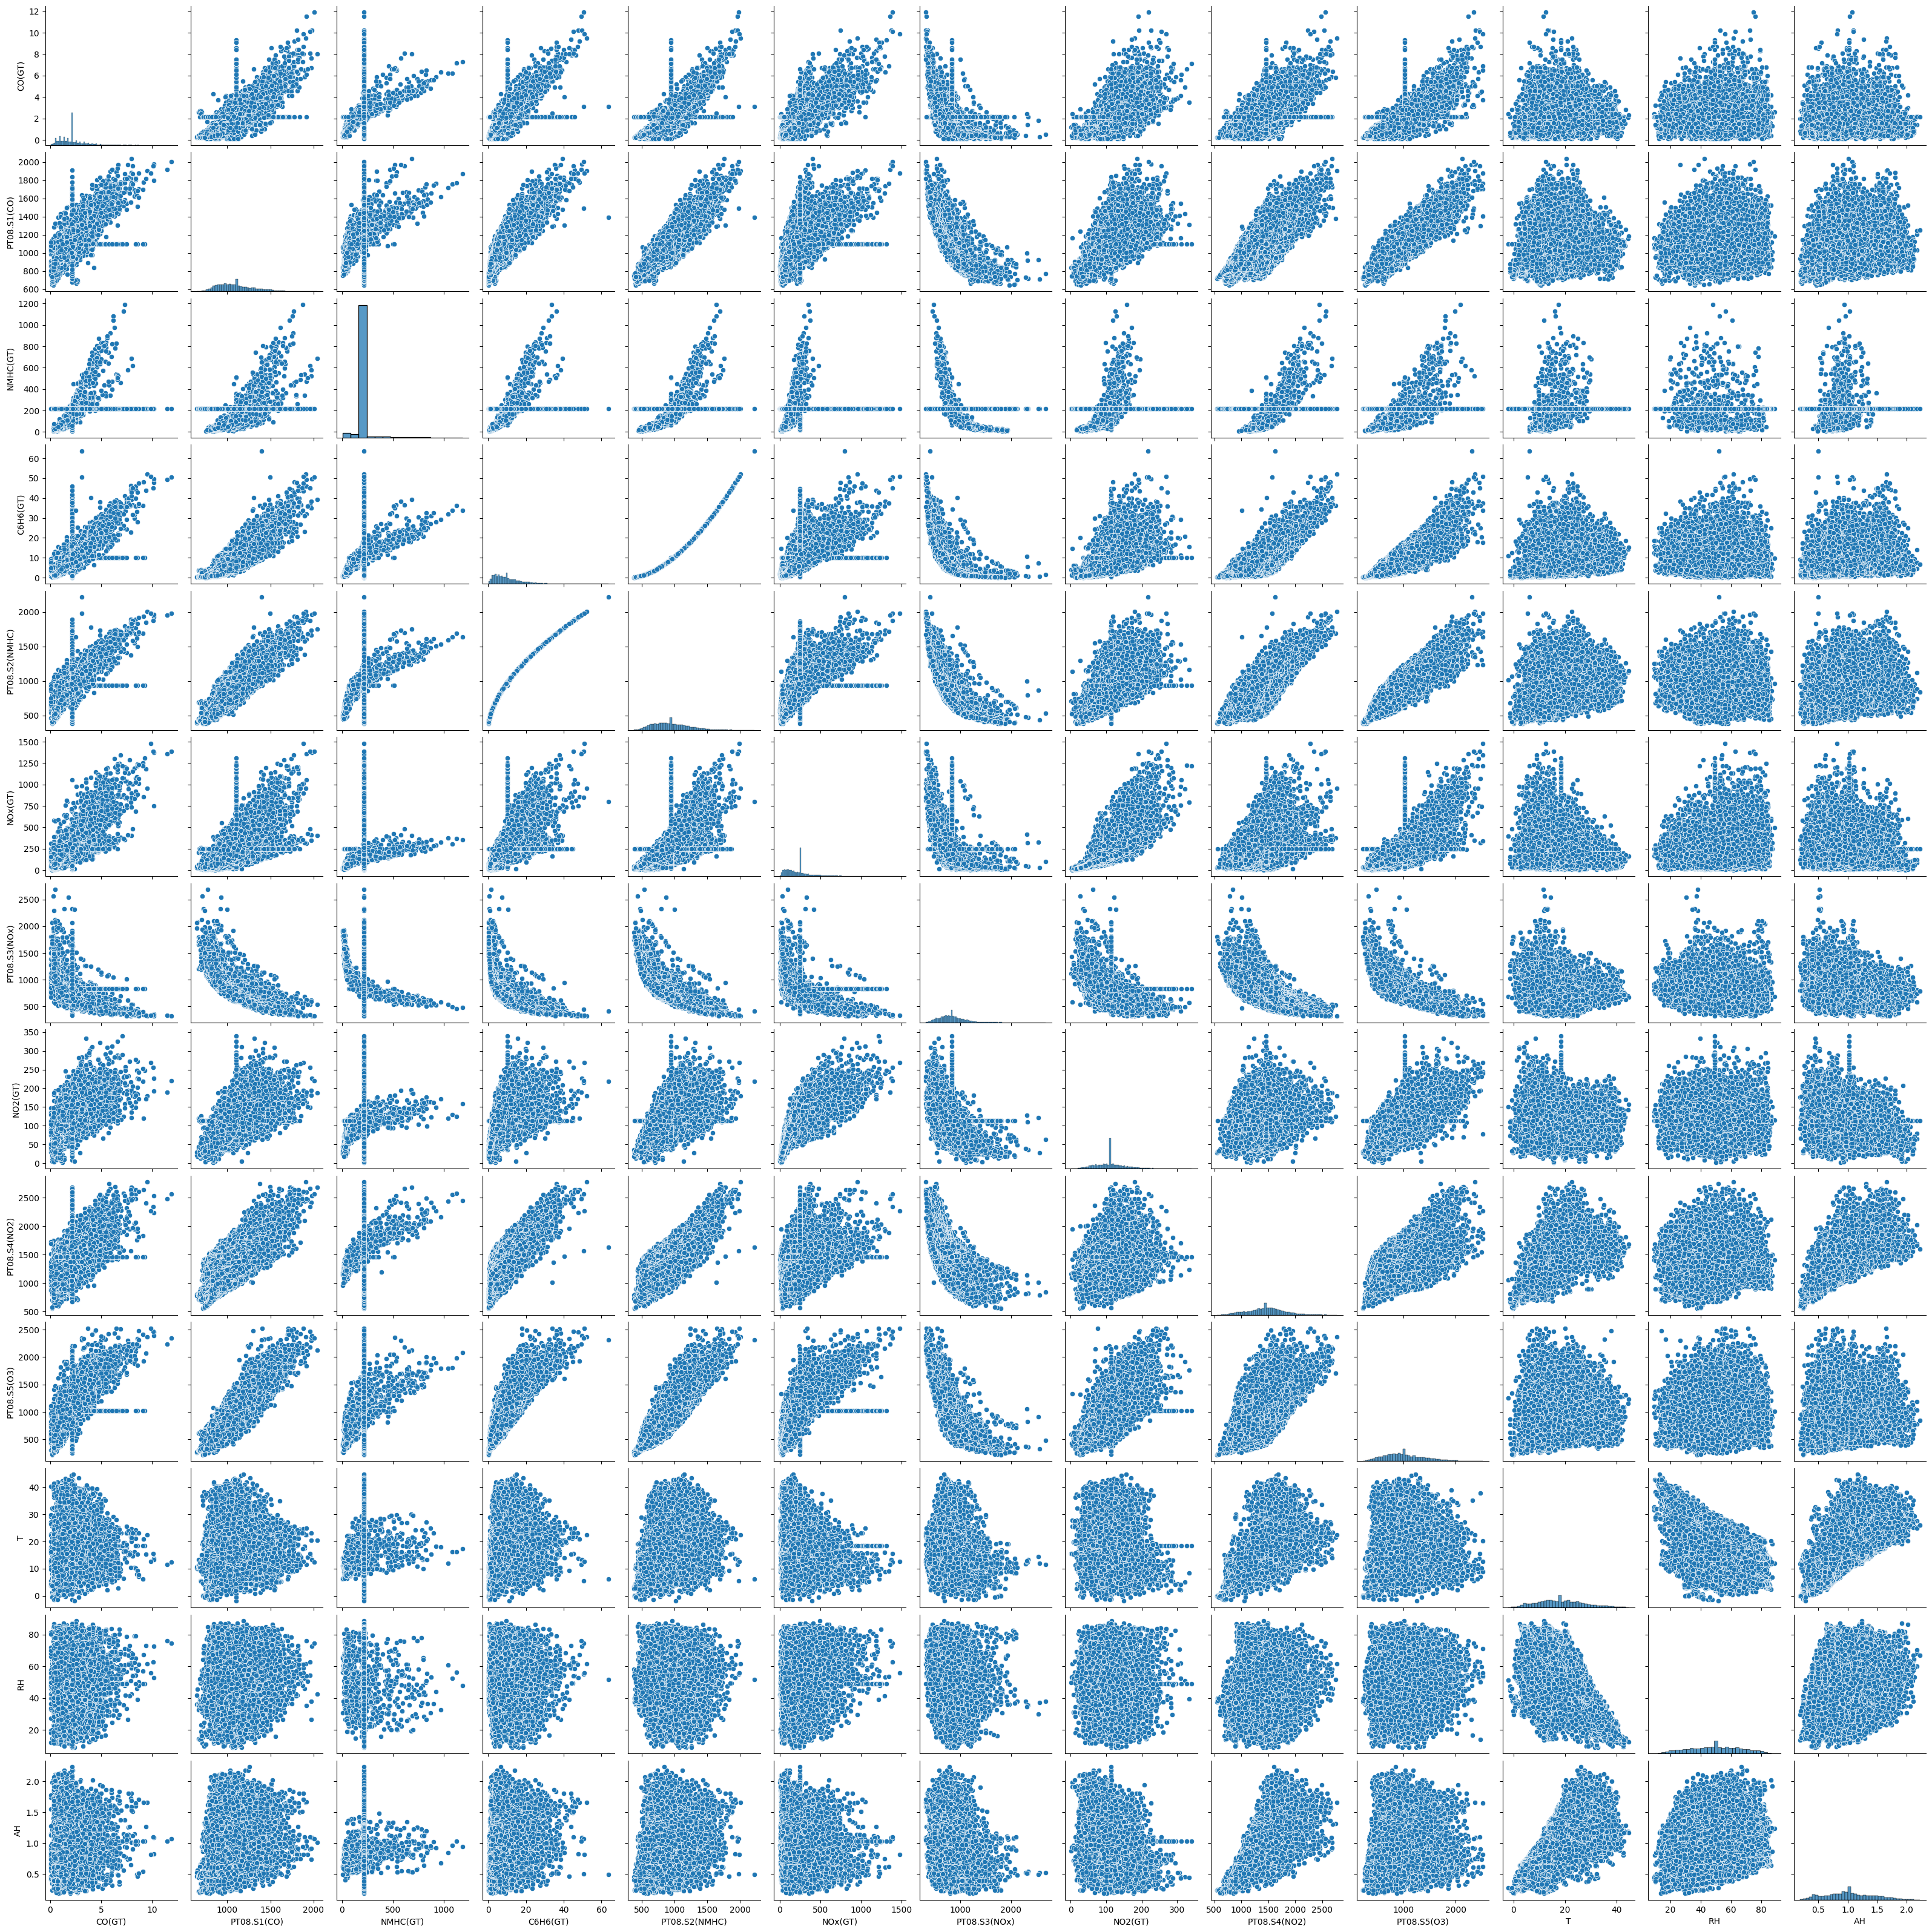

In [90]:
sns.pairplot(aqd)

In [94]:
aq=aqd
aq=aq.drop('Date',axis=1)
aq=aq.drop('Time',axis=1)
aq=aq.drop('C6H6(GT)',axis=1)

In [96]:
aq.head()

CO(GT)  PT08.S1(CO)  NMHC(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  \
0     2.6       1360.0     150.0         1046.0    166.0        1056.0   
1     2.0       1292.0     112.0          955.0    103.0        1174.0   
2     2.2       1402.0      88.0          939.0    131.0        1140.0   
3     2.2       1376.0      80.0          948.0    172.0        1092.0   
4     1.6       1272.0      51.0          836.0    131.0        1205.0   

   NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0    113.0        1692.0       1268.0  13.6  48.9  0.7578  
1     92.0        1559.0        972.0  13.3  47.7  0.7255  
2    114.0        1555.0       1074.0  11.9  54.0  0.7502  
3    122.0        1584.0       1203.0  11.0  60.0  0.7867  
4    116.0        1490.0       1110.0  11.2  59.6  0.7888

In [99]:
label=aqd['C6H6(GT)']
label.head()

0    11.9
1     9.4
2     9.0
3     9.2
4     6.5
Name: C6H6(GT), dtype: float64

In [101]:
X_train,X_test,y_train,y_test=train_test_split(aq,label,test_size=.3)

In [103]:
X_train.shape,y_train.shape

((6549, 12), (6549,))

In [105]:
X_test.shape,y_test.shape

((2808, 12), (2808,))

In [107]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [109]:
lr.score(X_test,y_test)

0.9754147145313709

In [111]:
y_pred=lr.predict(X_test)
y_pred

array([ 5.52523638, 20.9334352 , 14.30106788, ..., 11.27941204,
        1.78107447, 14.89692109])

In [113]:
lr.coef_

array([ 2.53775760e-01,  1.52769600e-03,  1.50848264e-03,  2.81810596e-02,
        2.55248113e-03,  3.81272334e-03, -1.07242709e-02,  4.12333522e-04,
       -2.29744796e-04, -1.01251242e-01, -2.85800129e-02,  1.30884987e+00])

In [117]:
mean_squared_error(y_test,y_pred)

1.2336718253813725

In [120]:
r2_score(y_test,y_pred)

0.9754147145313709